# Tarea 2
## David Leonardo Galicia Praskauer

### Histograma

In [1]:
azar = randn(10000)
"""
Genera un vector bin para graficar un histograma...
"""
function histo (datos::Array,N_hist::Int64)
    datos = azar
    sort!(datos) #orden
    sup = datos[end] 
    inf = datos[1]
    dx = (sup - inf)/ N_hist #largo intervalo
    bin = zeros(Int64,N_hist) #genero bin para contar repeticiones
    for i = 1 : length(datos)
            x1 = inf
        for j = 1 : N_hist
            x2 = x1 + dx
            if datos[i] <= x2
                bin[j] += 1
                break
            else
                x1 += dx
            end
        end
    end
    return bin
end

histo (generic function with 1 method)

In [2]:
bin2 = histo(azar,100)

100-element Array{Int64,1}:
  1
  2
  3
  6
  7
 10
  6
  6
  7
 10
  9
 12
 15
  ⋮
  2
  1
  1
  0
  0
  2
  1
  1
  0
  0
  0
  1

INFO: Loading help data...


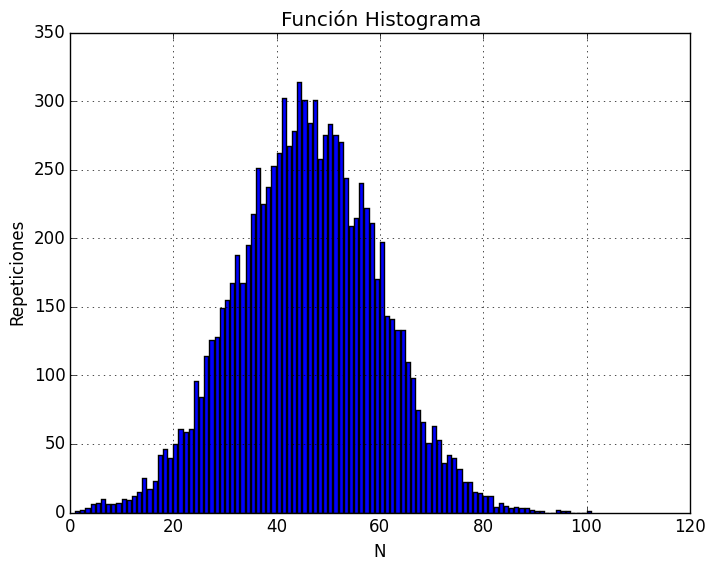

In [3]:
using PyPlot
bar(1:100,bin2)
grid("on")
xlabel("N")
ylabel("Repeticiones")
title("Función Histograma");

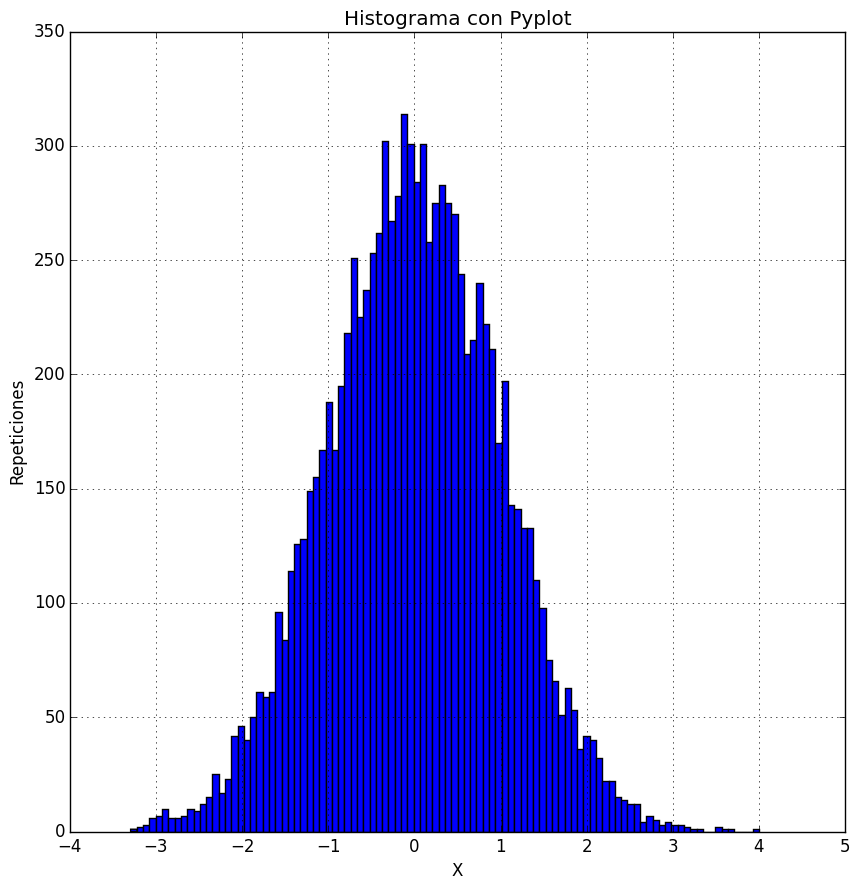

In [4]:
fig = figure("pyplot_histogram",figsize=(10,10))
ax = axes()
h = plt[:hist](azar,100)

grid("on")
xlabel("X")
ylabel("Repeticiones")
title("Histograma con Pyplot");

### Promedio y varianza

In [42]:
function varianza()
#aún no
end

varianza (generic function with 1 method)

In [5]:
var(azar)

0.994111578501382

In [40]:
function promedio()
#aún no
end

promedio (generic function with 1 method)

In [6]:
mean(azar)

-0.00485266593536976

In [8]:
function varyprom()
#aún no
end

varyprom (generic function with 1 method)

### Integración por método de Simpson

In [17]:
"""
Usa el método de ...
"""
function abe_simpson(f::Function,a::Float64,b::Float64,n::Int64)
    if iseven(n) == false
        println("Se necesita que n sea par.")
        return s1 = NaN
    else
        n = abs(n)
        dx = (b - a) / n
        s1 = f(a) + f (b)
        for i = 1 : n
            s1 +=  2*f(a + i*dx)
        end
        for i = 1 : n-1
            s1 += 4*f(a + i*dx)
        end
    end
    return s2 = s1 * dx / 3
end

abe_simpson (generic function with 3 methods)

In [26]:
abe_simpson(x->sin(x),0.0,10.0,10)

3.3663978533253913

### Referencias
https://en.wikipedia.org/wiki/Simpson%27s_rule .

http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb

Notebook de Luis y Arturo.